In [1]:
import numpy as np
import scipy
import scipy.stats
import matplotlib as mpl   
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transition_model = lambda x: np.random.normal(x, .5)
import math
def prior(w):
    if w <= 0:
        return 0
    else:
        return 1
    
def manual_log_lik_gamma(x, data):
    return np.sum((x[0] - 1) * np.log(data) - (1 / x[1]) * data - x[0] * np.log(x[1]) - np.log(math.gamma(x[0])))
    
def log_lik_gamma(x, data):
    return np.sum(np.log(scipy.stats.gamma(a = x[0], scale = x[1], loc = 0).pdf(data)))

def log_lik_poisson(x, data):
    return np.sum(scipy.stats.poisson.logpmf(data, x))

def acceptance(x, x_new):
    if x_new > x:
        return True
    else:
        accept = np.random.uniform(0, 1)
        # Since we did a log likelihood, we need to exponentiate in order to compare to the random number
        # less likely x_new are less likely to be accepted
        return (accept < (np.exp(x_new-x)))

In [3]:
def metropolis_hastings(likelihood_computer,
                        prior,
                        transition_model,
                        param_init,
                        iterations,
                        data,
                        acceptance_rule):
    # likelihood_computer(x,data): returns the likelihood that these parameters generated the data
    # transition_model(x): a function that draws a sample from a symmetric distribution and returns it
    # param_init: a starting sample
    # iterations: number of accepted to generated
    # data: the data that we wish to model
    # acceptance_rule(x,x_new): decides whether to accept or reject the new sample
    if likelihood_computer == log_lik_poisson:
        data_lik = [round(i) for i in data]
    x = param_init
    accepted = [param_init]
    rejected = []
    alltests = [param_init]
    for i in range(iterations):
        x_new = transition_model(x)
        if likelihood_computer == log_lik_poisson:
            x_lik = likelihood_computer(x, data_lik)
            x_new_lik = likelihood_computer(x_new, data_lik)
        else:
            x_lik = likelihood_computer(x, data)
            x_new_lik = likelihood_computer(x_new, data)
        alltests.append(x_new)
        if (acceptance_rule(x_lik + np.log(prior(x)), x_new_lik + np.log(prior(x_new)))):            
            x = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)
        
        if i % 10000 == 9999:
            print(i + 1)
                
    return np.array(alltests), np.array(accepted), np.array(rejected)




10000
20000


<ipython-input-3-7c6a3c6d1c00>:29: RuntimeWarning: divide by zero encountered in log
  if (acceptance_rule(x_lik + np.log(prior(x)), x_new_lik + np.log(prior(x_new)))):


30000
40000
50000
1.9290547071331916



1.928678764456526






<ipython-input-3-7c6a3c6d1c00>:29: RuntimeWarning: divide by zero encountered in log
  if (acceptance_rule(x_lik + np.log(prior(x)), x_new_lik + np.log(prior(x_new)))):


10000
20000
30000
40000
50000
1.9246905089408528



1.925171335052672




10000
20000
30000


<ipython-input-3-7c6a3c6d1c00>:29: RuntimeWarning: divide by zero encountered in log
  if (acceptance_rule(x_lik + np.log(prior(x)), x_new_lik + np.log(prior(x_new)))):


40000
50000
1.9183108341986848



<ipython-input-4-a032a572ddb8>:129: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize = (10, 10))




1.9187307923729109




10000
20000


<ipython-input-3-7c6a3c6d1c00>:29: RuntimeWarning: divide by zero encountered in log
  if (acceptance_rule(x_lik + np.log(prior(x)), x_new_lik + np.log(prior(x_new)))):


30000
40000
50000
1.9043189368770763



1.9055630902694491




10000
20000
30000
40000
50000
2.06123410268488



2.0619255292421412






<ipython-input-3-7c6a3c6d1c00>:29: RuntimeWarning: divide by zero encountered in log
  if (acceptance_rule(x_lik + np.log(prior(x)), x_new_lik + np.log(prior(x_new)))):


10000
20000
30000
40000
50000
1.712269272529859



1.7134532244273128



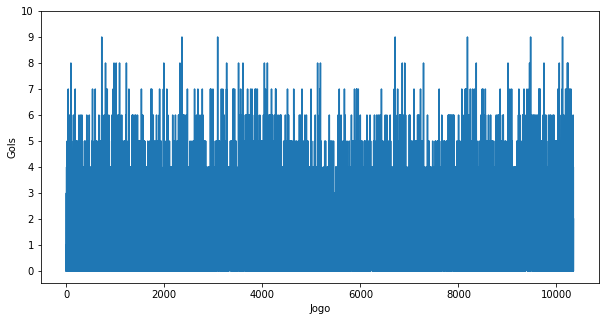

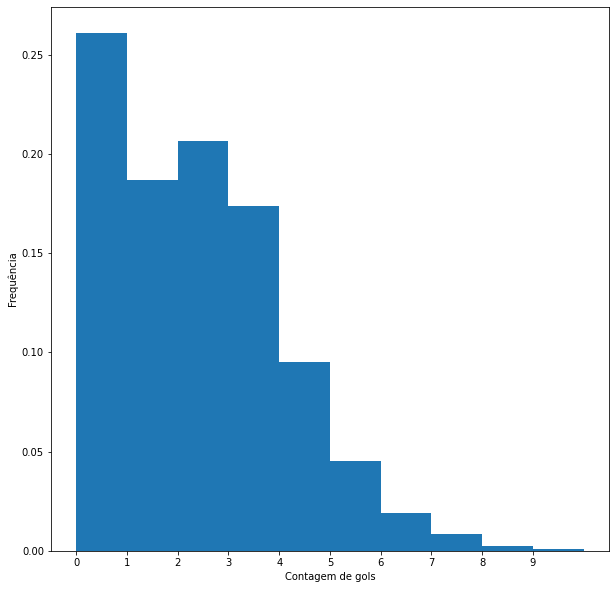

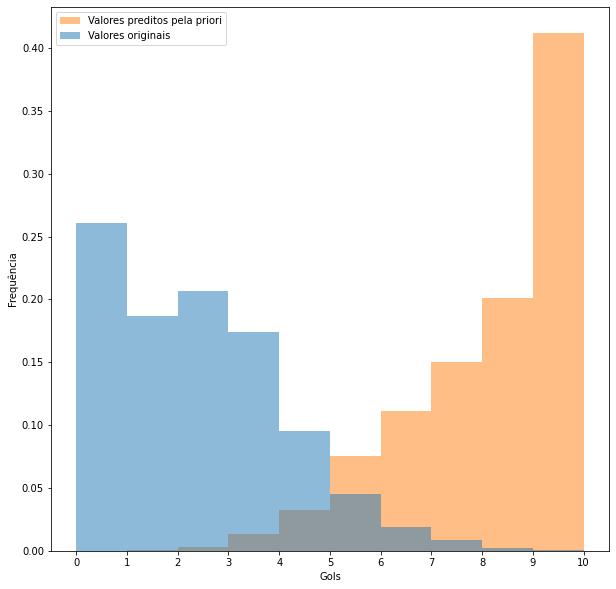

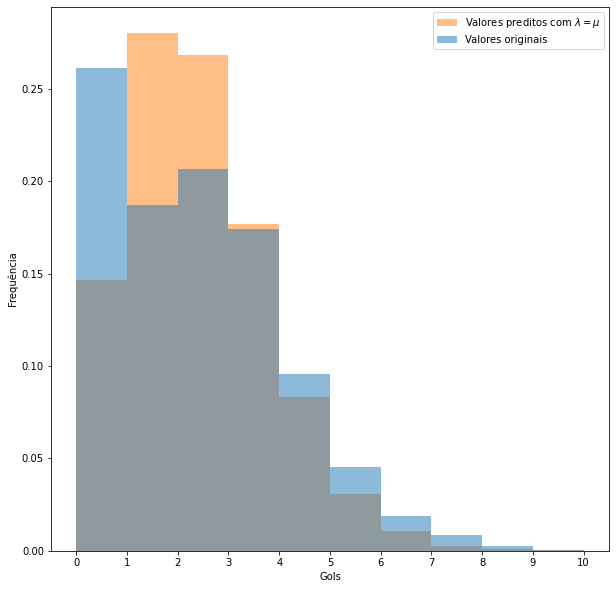

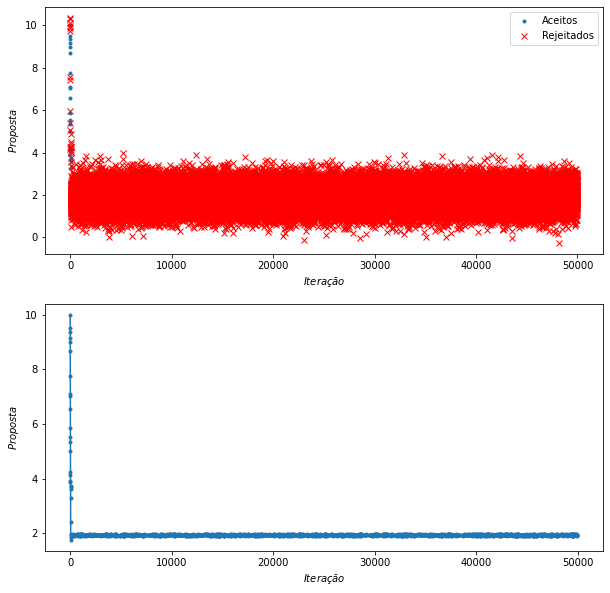

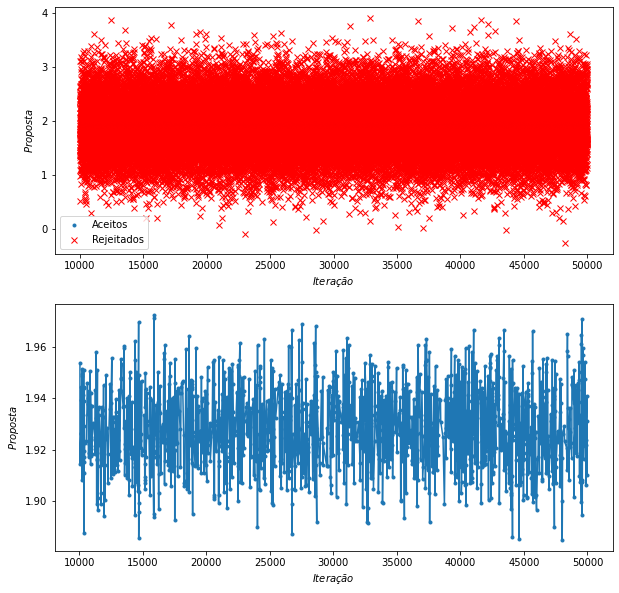

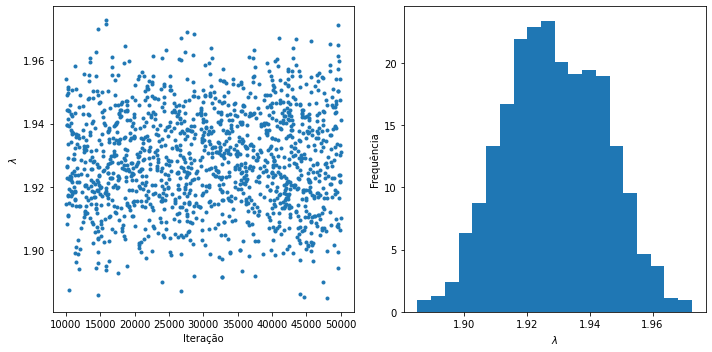

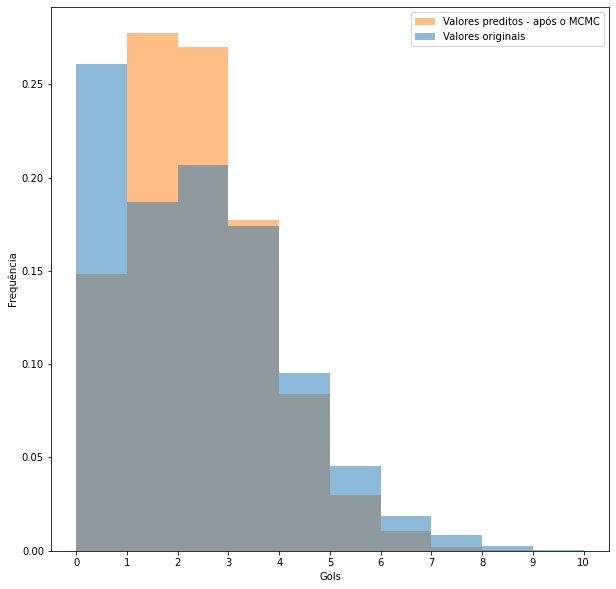

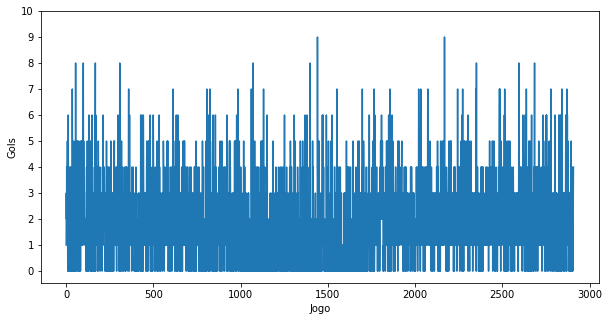

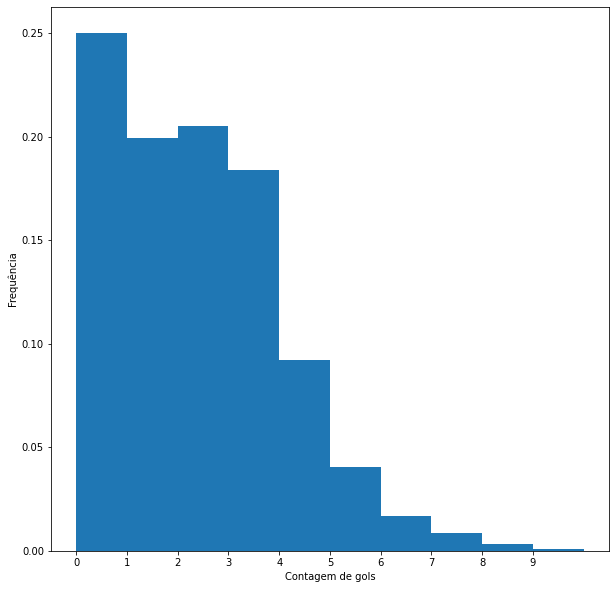

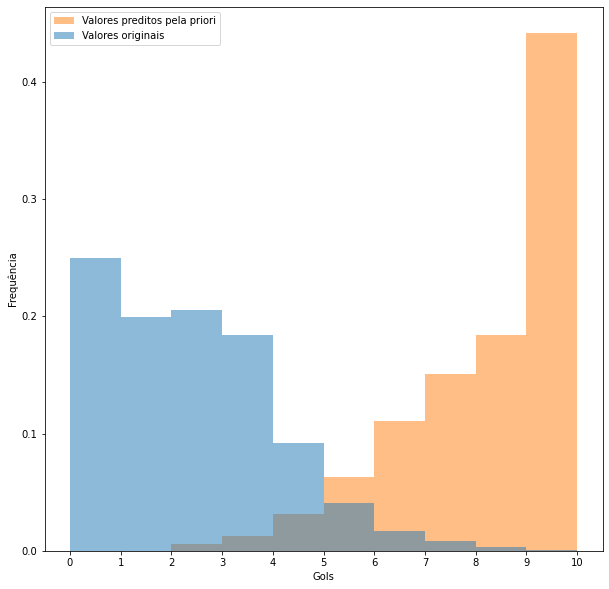

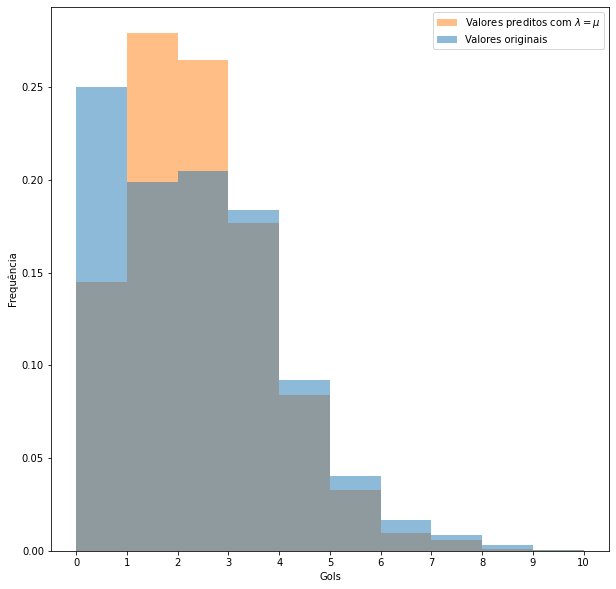

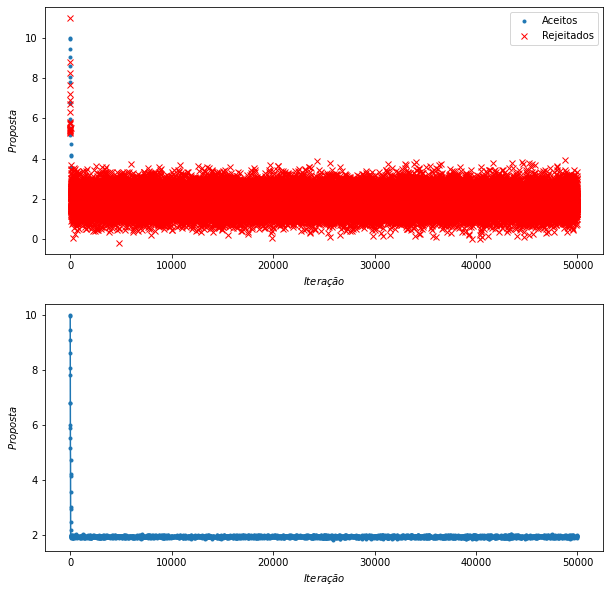

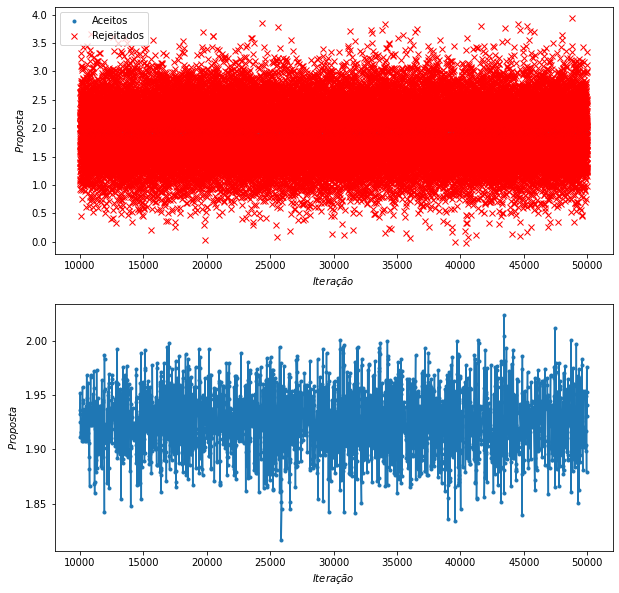

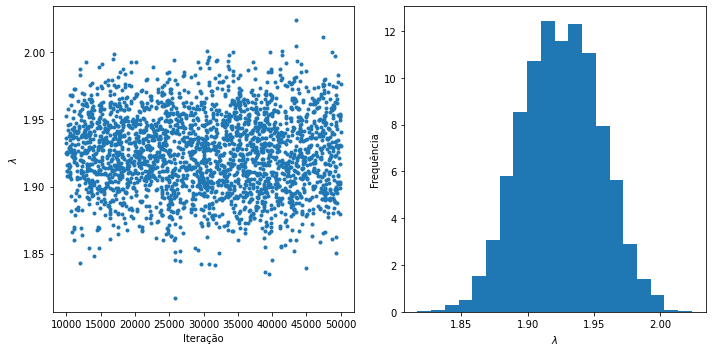

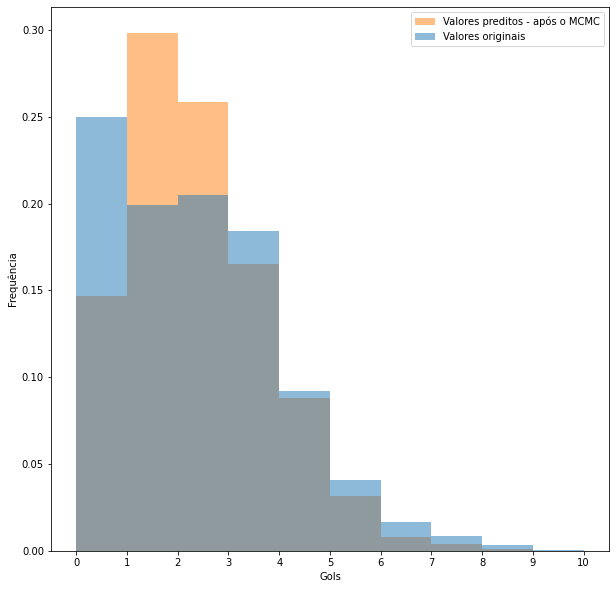

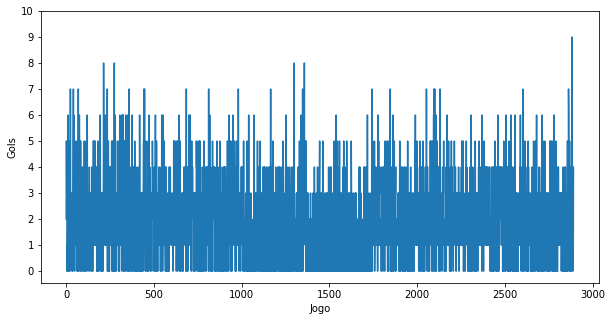

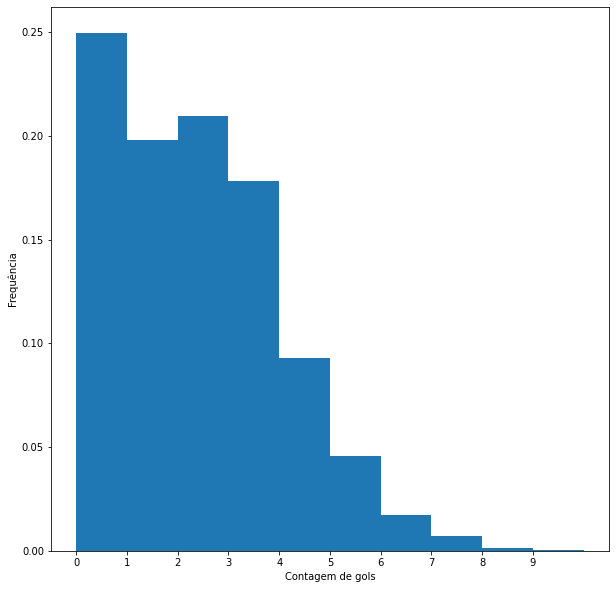

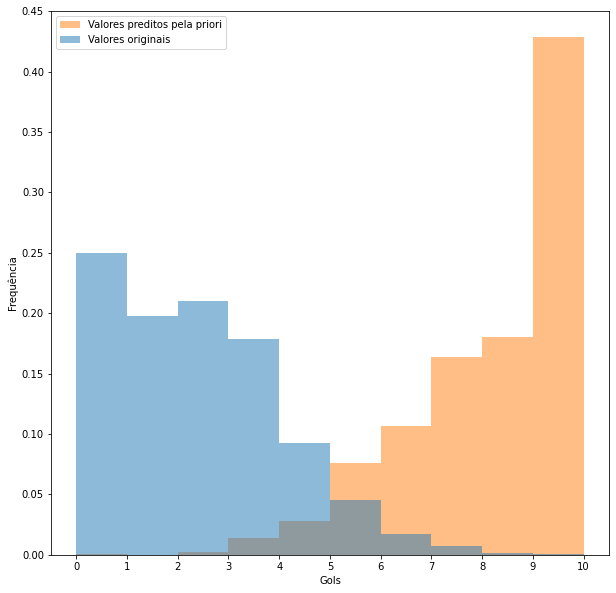

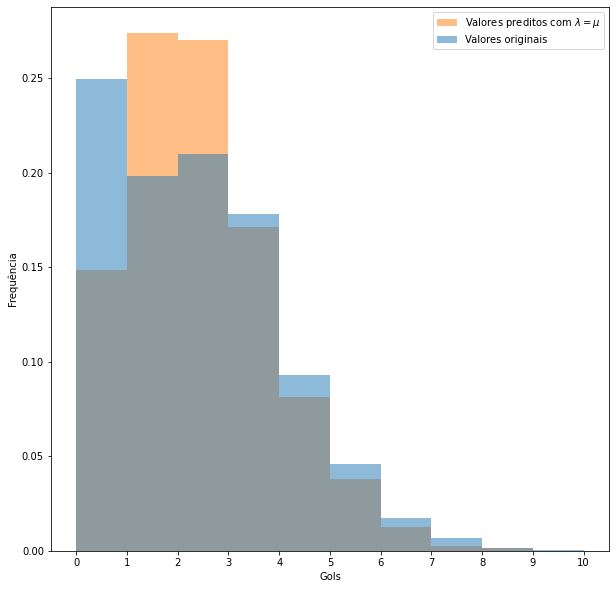

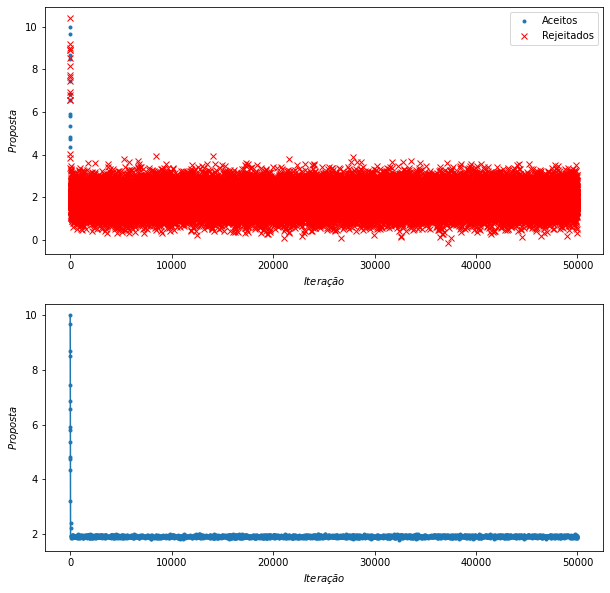

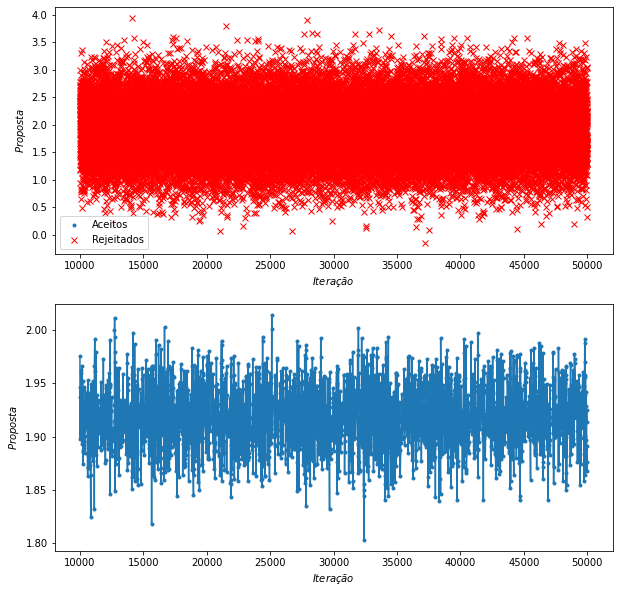

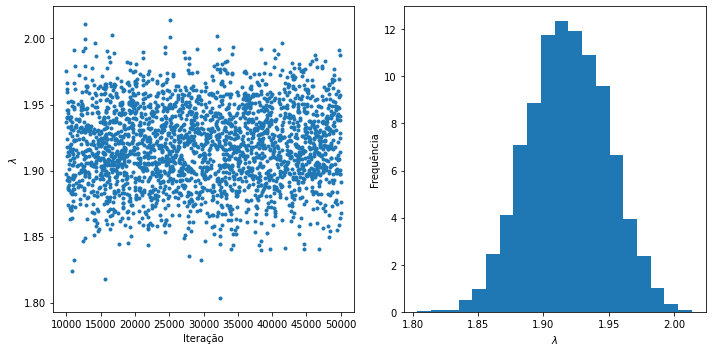

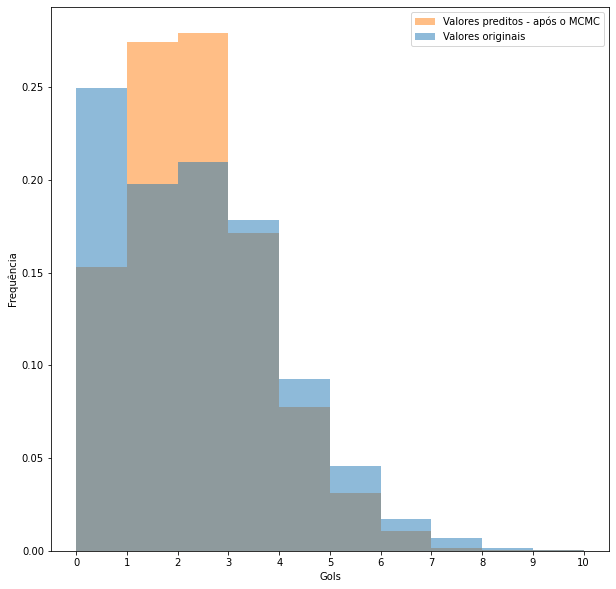

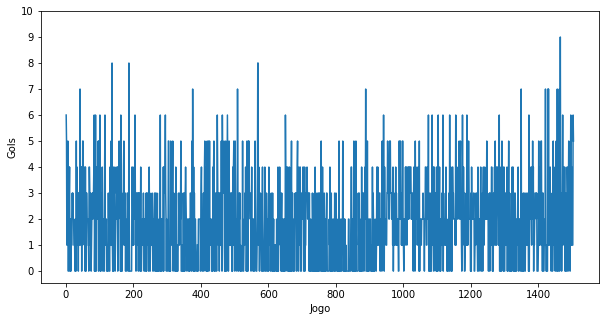

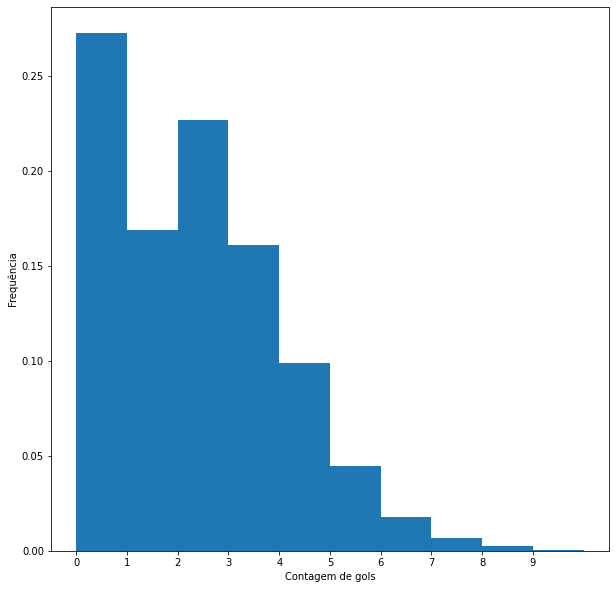

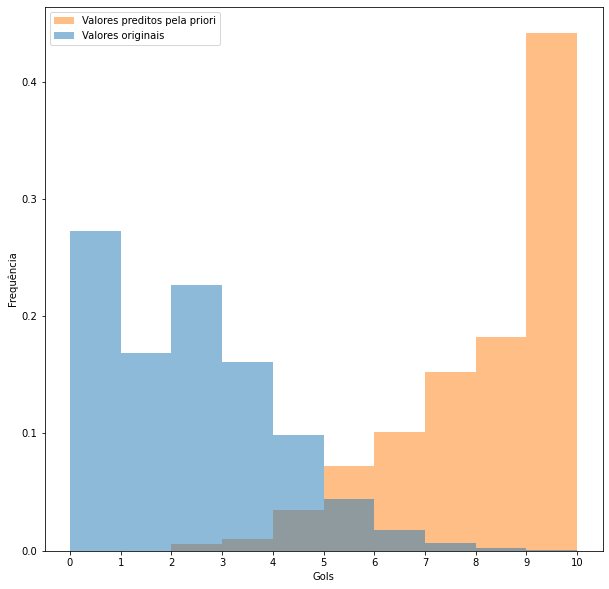

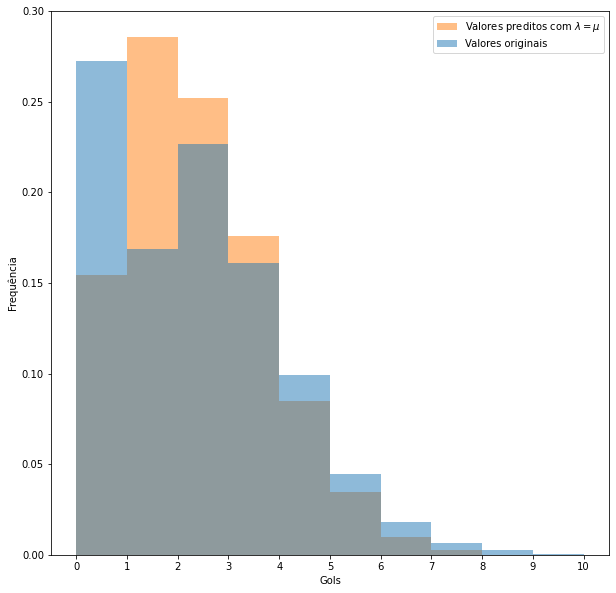

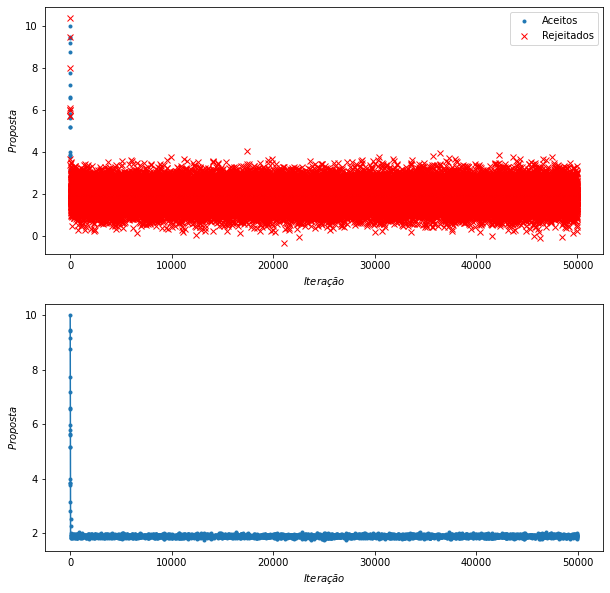

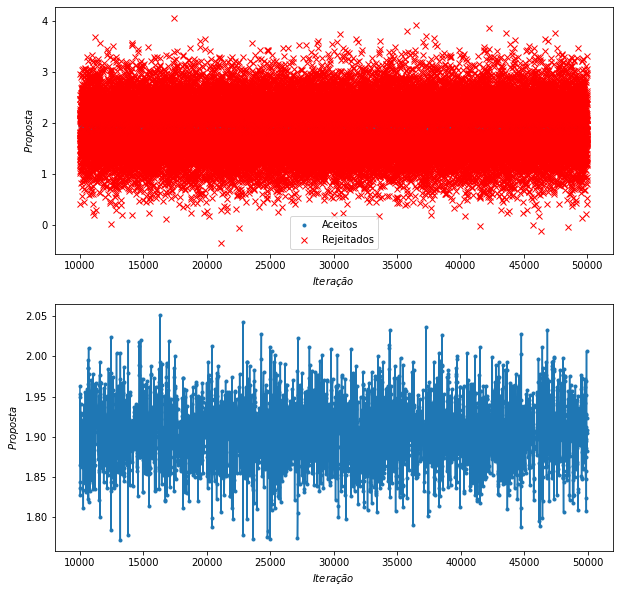

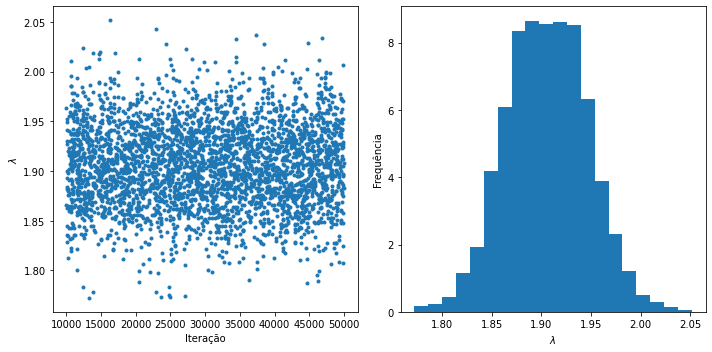

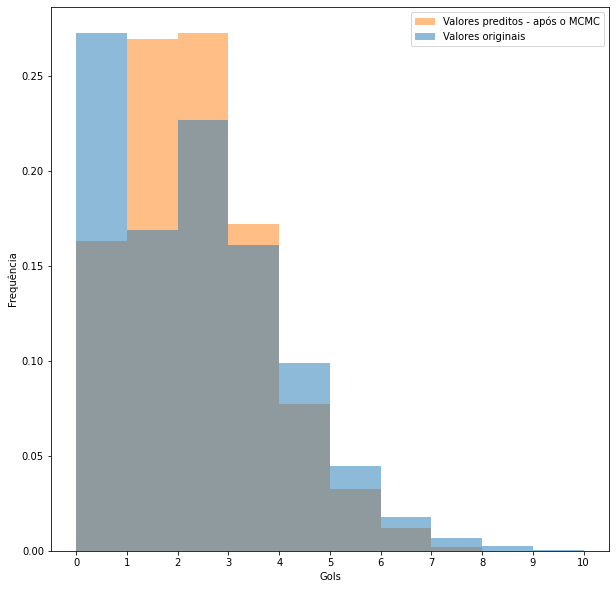

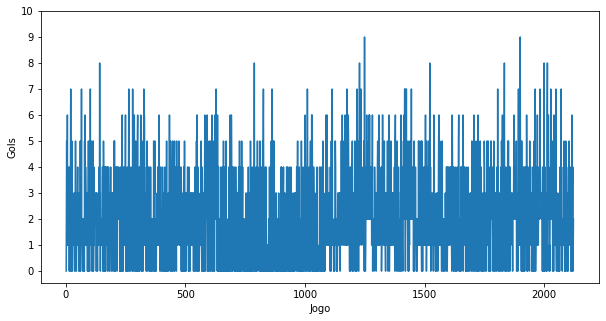

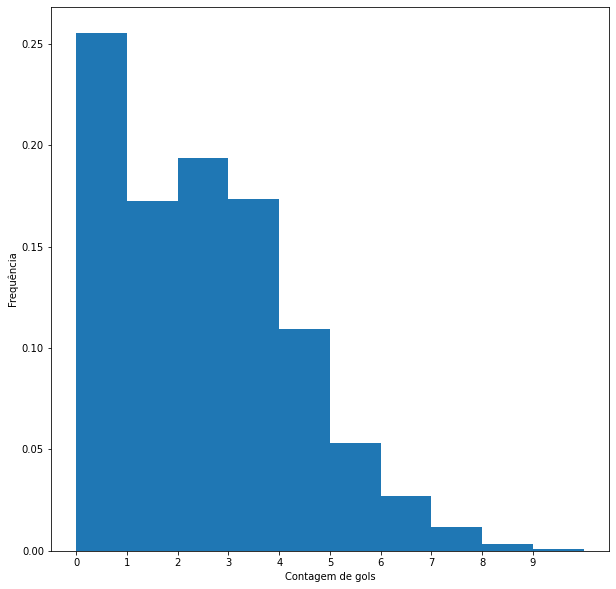

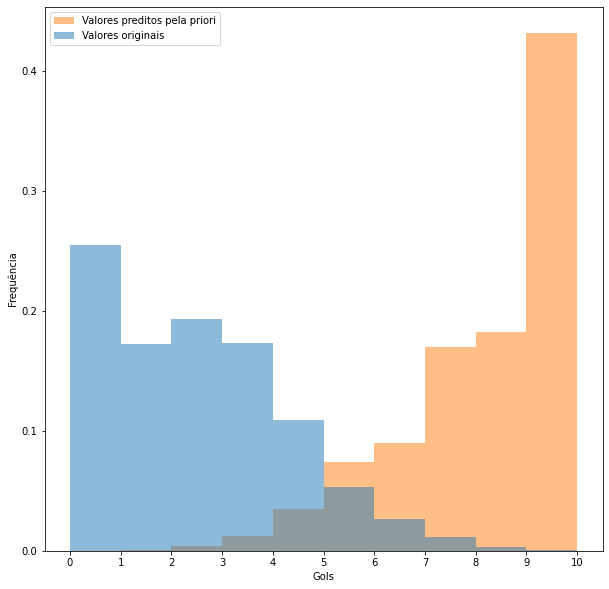

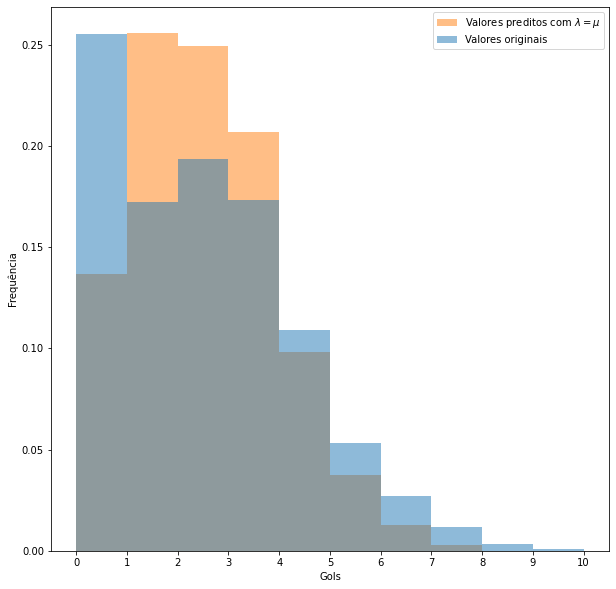

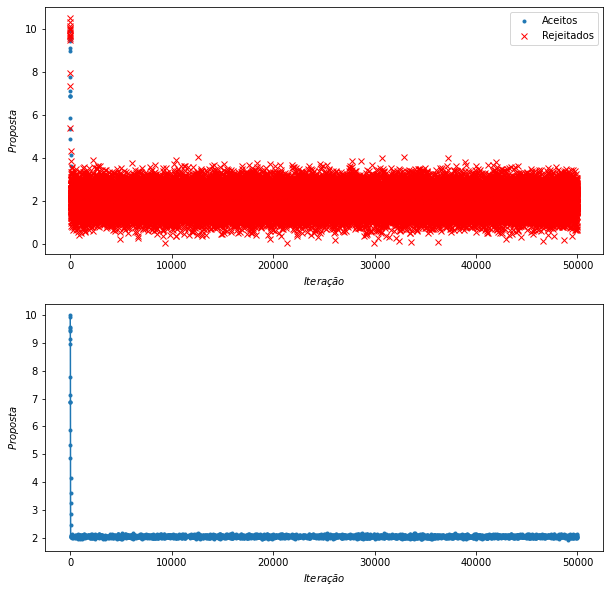

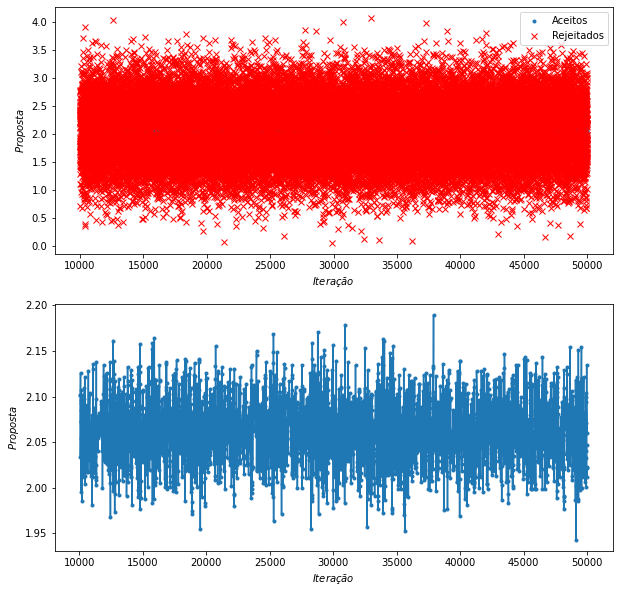

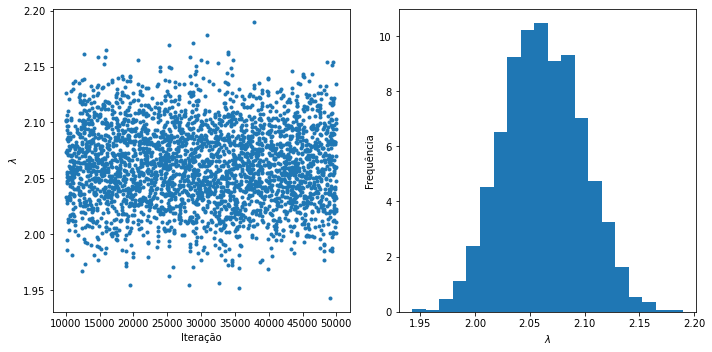

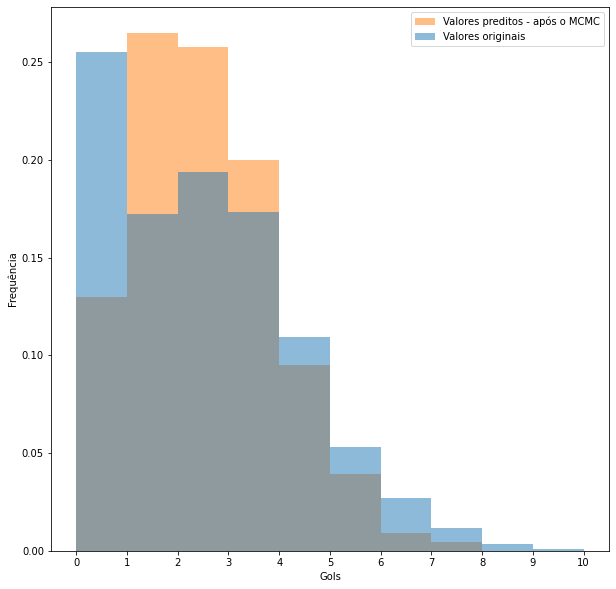

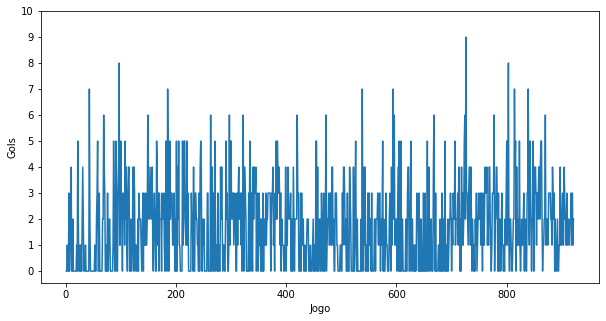

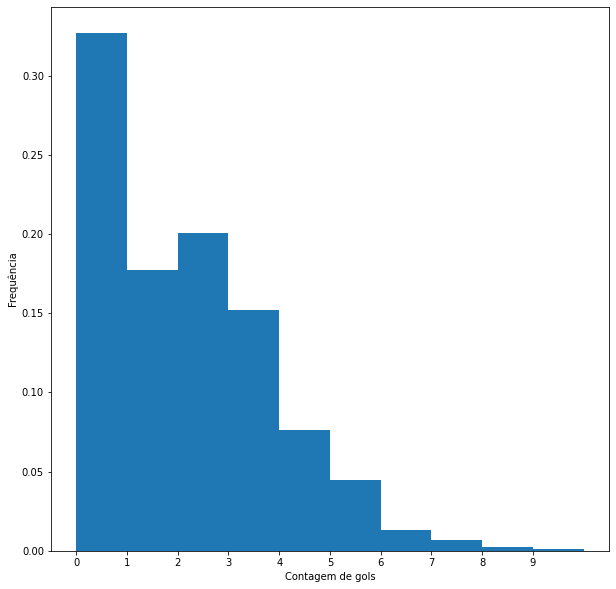

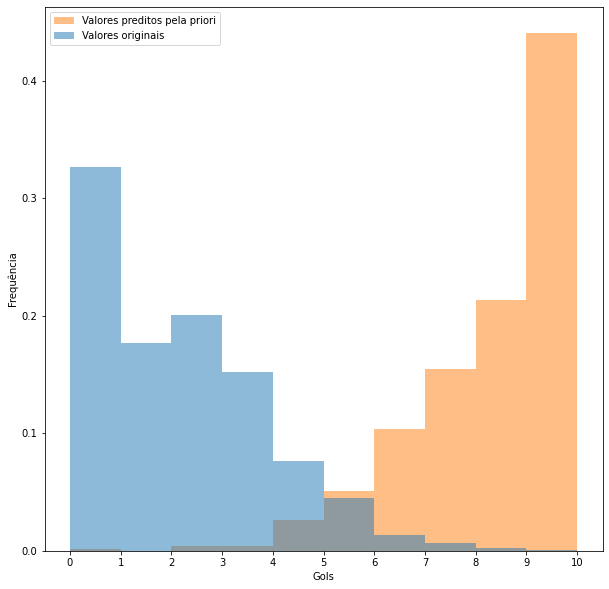

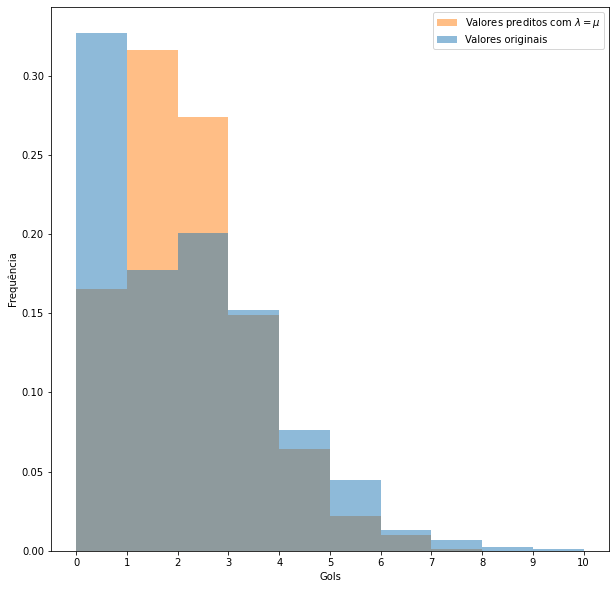

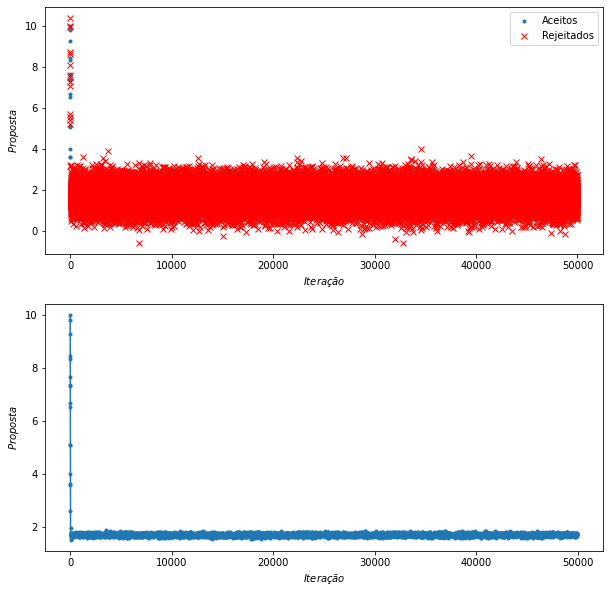

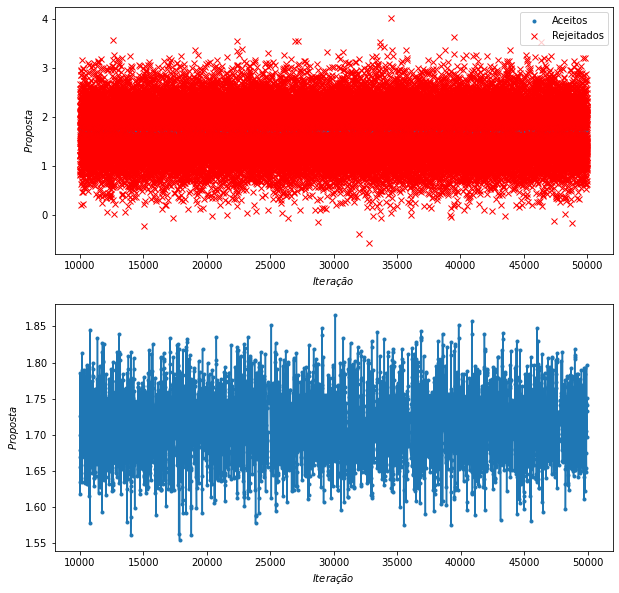

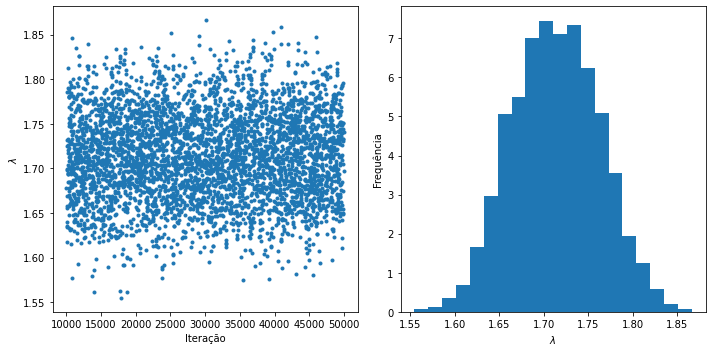

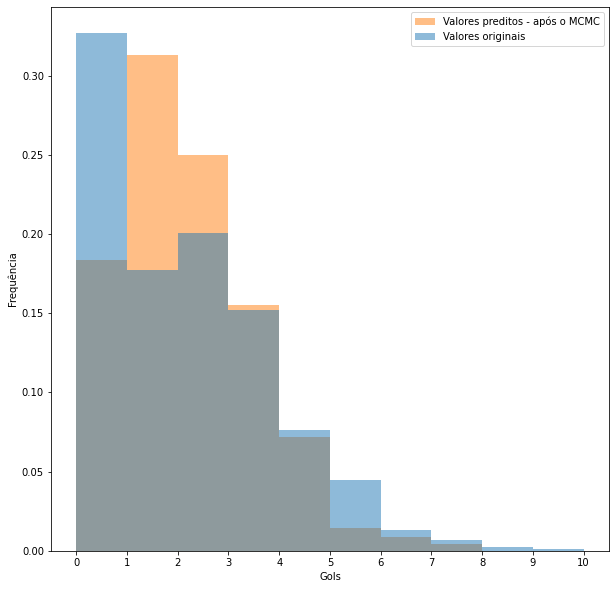

In [4]:
competitions = ['', ' - SA', ' - SB', ' - SC', ' - SD', ' - CdB']

for competition in competitions:
    goals = np.loadtxt("..\\all goals{}.csv".format(competition), delimiter=',')
    goals = list(goals)
    for i in range(len(goals)):
        goals[i] = list(goals[i])

    cont = []
    p = False
    for i in range(len(goals)):
        j = 0
        while j <= 9 and i + j < len(goals):
            if goals[i + j][2] != 0:
                p = False
                break
            else:
                p = True
            j += 1
        if p:
            for j in range(10):
                cont.append(goals[i + j])

    for i in cont:
        try:
            goals.remove(i)
        except:
            pass

    for i in range(len(goals)):
        goals[i][1] = i + 1
        goals[i] = np.array(goals[i])

    goals = np.array(goals)
    x_init = 10
    iterations = 50000
    figure = 1
    first = 500
    last = 500
    years = goals[:, 1]
    activity = goals[:, 2]

    fig = plt.figure(figsize = (10, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(years, activity, label = "Gols", color = "#1F77B4")
    ax.set_yticks(np.arange(0, 11, 1))
    ax.set_xlabel("Jogo")
    ax.set_ylabel("Gols")
    # ax.set_title("Figura {}: Gols por jogo no período de 2013 a 2020 na Série A do Campeonato Brasileiro".format(figure))
    figure += 1
    plt.savefig('fig01{} - poisson.png'.format(competition))
    print()


    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1, 1, 1)
    ax.hist(activity, bins = np.linspace(0, 10, 11), density = True, color = "#1F77B4")
    ax.set_xticks(np.arange(0, 10, 1))
    ax.set_xlabel("Contagem de gols")
    ax.set_ylabel("Frequência")
    # ax.set_title("Figura {}: Histograma mostrando a frequência de gols por jogo nos 8 anos (2013-2020)".format(figure))
    figure += 1
    plt.savefig('fig02{} - poisson.png'.format(competition))
    print()


    mu = x_init
    model = lambda t, mu: np.random.poisson(mu, t)
    t = np.arange(activity.shape[0])
    observation_gen = model(t.shape[0], mu)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1, 1, 1)

    ax.hist(observation_gen, bins = np.linspace(0, 10, 11), density = True, label = "Valores preditos pela priori", color = "#FFBE86")
    ax.hist(activity, bins = np.linspace(0, 10, 11), alpha = 0.5, density = True, label = "Valores originais", color = "#1F77B4")
    ax.set_xlabel("Gols")
    ax.set_ylabel("Frequência")
    ax.set_xticks(np.arange(0, 11, 1))
    # ax.set_title("Figura {}: Distribuição a priori das predições".format(figure))
    figure += 1
    ax.legend()
    plt.savefig('fig03{} - poisson.png'.format(competition))
    print()


    alltests, accepted, rejected = metropolis_hastings(log_lik_poisson,
                                                       prior,
                                                       transition_model,
                                                       x_init,
                                                       iterations,
                                                       activity,
                                                       acceptance)


    # PELA MÉDIA DE GOLS
    data_lik = [round(i) for i in activity]
    mu = np.array(data_lik).mean()
    print(mu)
    model = lambda t, mu: np.random.poisson(mu, t)
    t = np.arange(activity.shape[0])
    observation_gen = model(t.shape[0], mu)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1, 1, 1)

    ax.hist(observation_gen, bins = np.linspace(0, 10, 11), density = True, label = "Valores preditos com $\lambda = \mu$", color = "#FFBE86")
    ax.hist(activity, bins = np.linspace(0, 10, 11), alpha = 0.5, density = True, label = "Valores originais", color = "#1F77B4")
    ax.set_xlabel("Gols")
    ax.set_ylabel("Frequência")
    ax.set_xticks(np.arange(0, 11, 1))
    # ax.set_title("Figura {}: Distribuição a posteriori das predições".format(figure))
    figure += 1
    ax.legend()
    plt.savefig('fig04{} - poisson.png'.format(competition))
    print()


    a = []
    r = []
    for i in range(len(alltests)):
        if alltests[i] in accepted:
            a.append([i, alltests[i]])
        else:
            r.append([i, alltests[i]])


    aceitos = np.array(a)
    rejeitados = np.array(r)

    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(2, 1, 1)
    ax.plot(aceitos[:, 0], aceitos[:, 1], 'b.', label = 'Aceitos', color = "#1F77B4")
    ax.plot(rejeitados[:, 0], rejeitados[:, 1], 'rx', label = 'Rejeitados')
    ax.set_xlabel("$Iteração$")
    ax.set_ylabel("$Proposta$")
    ax.legend()

    ax = fig.add_subplot(2, 1, 2)
    ax.plot(aceitos[:, 0], aceitos[:, 1], label = "Caminho", color = "#1F77B4")
    ax.plot(aceitos[:, 0], aceitos[:, 1], 'b.', label = 'Aceitos', color = "#1F77B4")
    ax.set_xlabel("$Iteração$")
    ax.set_ylabel("$Proposta$")
    plt.savefig('fig05{} - poisson.png'.format(competition))
    print()


    show = int(0.8 * len(alltests))
    a = []
    r = []
    for i in range(len(alltests) - show + 1, len(alltests)):
        if alltests[i] in accepted:
            a.append([i, alltests[i]])
        else:
            r.append([i, alltests[i]])


    aceitos = np.array(a)
    rejeitados = np.array(r)

    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(2, 1, 1)
    ax.plot(aceitos[:, 0], aceitos[:, 1], 'b.', label = 'Aceitos', color = "#1F77B4")
    ax.plot(rejeitados[:, 0], rejeitados[:, 1], 'rx', label = 'Rejeitados')
    ax.set_xlabel("$Iteração$")
    ax.set_ylabel("$Proposta$")
    ax.legend()

    ax = fig.add_subplot(2, 1, 2)
    ax.plot(aceitos[:, 0], aceitos[:, 1], label = "Caminho", color = "#1F77B4")
    ax.plot(aceitos[:, 0], aceitos[:, 1], 'b.', label = 'Aceitos', color = "#1F77B4")
    ax.set_xlabel("$Iteração$")
    ax.set_ylabel("$Proposta$")
    plt.savefig('fig06{} - poisson.png'.format(competition))
    print()


    fig = plt.figure(figsize = (10, 5))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(aceitos[:, 0], aceitos[:, 1], 'b.', label = 'Aceitos', color = "#1F77B4")
    # ax.set_title("Figura {}: Traço de $a$".format(figure))
    figure += 1
    ax.set_xlabel("Iteração")
    ax.set_ylabel("$\lambda$")
    ax = fig.add_subplot(1, 2, 2)
    data, binsa, alpha = ax.hist(aceitos[:, 1], bins = 20, density = True, color = "#1F77B4")
    ax.set_ylabel("Frequência")
    ax.set_xlabel("$\lambda$")
    # ax.set_title("Figura {}: Histograma de $a$".format(figure))
    figure += 1
    plt.savefig('fig07{} - poisson.png'.format(competition))
    fig.tight_layout()


    # PELA MÉDIA DAS ÚLTIMAS ITERAÇÕES
    mu = aceitos[:, 1].mean()
    print(mu)
    model = lambda t, mu: np.random.poisson(mu, t)
    t = np.arange(activity.shape[0])
    observation_gen = model(t.shape[0], mu)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1, 1, 1)

    ax.hist(observation_gen, bins = np.linspace(0, 10, 11), density = True, label = "Valores preditos - após o MCMC", color = "#FFBE86")
    ax.hist(activity, bins = np.linspace(0, 10, 11), alpha = 0.5, density = True, label = "Valores originais", color = "#1F77B4")
    ax.set_xlabel("Gols")
    ax.set_ylabel("Frequência")
    ax.set_xticks(np.arange(0, 11, 1))
    # ax.set_title("Figura {}: Distribuição a posteriori das predições".format(figure))
    figure += 1
    ax.legend()
    plt.savefig('fig08{} - poisson.png'.format(competition))
    print()